In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
df=pd.read_csv(r"../data/attrition_data_with_calculated_columns.csv")
df.drop(['EMP_ID', 'TERMINATION_YEAR', 'COMBINED_JOB_GROUP', 'DISCRETIZED_ANNUAL_RATE', 'DISCRETIZED_AGE', 'PREVYR_1_PRESENT', 'PREVYR_2_PRESENT', 'PREVYR_3_PRESENT', 'PREVYR_4_PRESENT', 'PREVYR_5_PRESENT', 'employee_cnt', 'white_rate', 'asian_rate', 'black_rate', 'hispa_rate'], axis = 1, inplace=True)
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [3]:
x=df.drop(['STATUS'], axis=1)
y=df['STATUS']

In [4]:
x = pd.get_dummies(x, columns=['REFERRAL_SOURCE', 'ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'HIRE_MONTH', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'JOB_GROUP'])

In [5]:
to_be_label_encoded = ['EDUCATION_LEVEL']
label_encoder = LabelEncoder()
for column in to_be_label_encoded:
    x[column] = label_encoder.fit_transform(x[column])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [7]:
parameters = {"learning_rate": [0.1,0.05],"max_depth": [5,10],'loss_function':['Logloss', 'CrossEntropy'],"n_estimators":[100,200]}
cat_model = CatBoostClassifier(random_state=42)
gridsearchcat  = GridSearchCV(cat_model, parameters,cv=4,verbose=3)
gridsearchcat.fit(x_train, y_train)
y_pred = gridsearchcat.predict(x_test)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] learning_rate=0.1, loss_function=Logloss, max_depth=5, n_estimators=100 
0:	learn: 0.6831492	total: 54ms	remaining: 5.34s
1:	learn: 0.6715125	total: 59ms	remaining: 2.89s
2:	learn: 0.6582257	total: 63.5ms	remaining: 2.05s
3:	learn: 0.6503354	total: 68ms	remaining: 1.63s
4:	learn: 0.6421487	total: 72.9ms	remaining: 1.39s
5:	learn: 0.6351957	total: 78.2ms	remaining: 1.23s
6:	learn: 0.6299743	total: 83.3ms	remaining: 1.11s
7:	learn: 0.6237952	total: 88.3ms	remaining: 1.01s
8:	learn: 0.6194193	total: 93.4ms	remaining: 944ms
9:	learn: 0.6142532	total: 98.2ms	remaining: 884ms
10:	learn: 0.6113485	total: 102ms	remaining: 828ms
11:	learn: 0.6069510	total: 108ms	remaining: 790ms
12:	learn: 0.6040968	total: 112ms	remaining: 753ms
13:	learn: 0.6010206	total: 118ms	remaining: 725ms
14:	learn: 0.5983641	total: 123ms	remaining: 696ms
15:	learn: 0.5949597	total: 128ms	remaining: 671ms
16:	learn: 0.5924488	total: 132ms	remaining: 644ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


21:	learn: 0.5841949	total: 156ms	remaining: 555ms
22:	learn: 0.5821014	total: 162ms	remaining: 542ms
23:	learn: 0.5801213	total: 167ms	remaining: 528ms
24:	learn: 0.5791864	total: 172ms	remaining: 515ms
25:	learn: 0.5779003	total: 176ms	remaining: 502ms
26:	learn: 0.5764249	total: 181ms	remaining: 490ms
27:	learn: 0.5743927	total: 186ms	remaining: 479ms
28:	learn: 0.5713934	total: 191ms	remaining: 469ms
29:	learn: 0.5703056	total: 197ms	remaining: 459ms
30:	learn: 0.5688319	total: 201ms	remaining: 448ms
31:	learn: 0.5678460	total: 206ms	remaining: 438ms
32:	learn: 0.5665305	total: 211ms	remaining: 428ms
33:	learn: 0.5646339	total: 217ms	remaining: 420ms
34:	learn: 0.5637898	total: 221ms	remaining: 411ms
35:	learn: 0.5626204	total: 226ms	remaining: 402ms
36:	learn: 0.5608700	total: 231ms	remaining: 393ms
37:	learn: 0.5604131	total: 236ms	remaining: 384ms
38:	learn: 0.5590788	total: 240ms	remaining: 375ms
39:	learn: 0.5585339	total: 245ms	remaining: 367ms
40:	learn: 0.5578138	total: 250

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


37:	learn: 0.5497815	total: 177ms	remaining: 289ms
38:	learn: 0.5488919	total: 182ms	remaining: 285ms
39:	learn: 0.5478630	total: 186ms	remaining: 280ms
40:	learn: 0.5466927	total: 191ms	remaining: 275ms
41:	learn: 0.5455254	total: 195ms	remaining: 270ms
42:	learn: 0.5444633	total: 200ms	remaining: 266ms
43:	learn: 0.5432209	total: 205ms	remaining: 261ms
44:	learn: 0.5426450	total: 210ms	remaining: 257ms
45:	learn: 0.5417796	total: 215ms	remaining: 252ms
46:	learn: 0.5410731	total: 220ms	remaining: 248ms
47:	learn: 0.5401648	total: 225ms	remaining: 244ms
48:	learn: 0.5389691	total: 228ms	remaining: 238ms
49:	learn: 0.5377271	total: 233ms	remaining: 233ms
50:	learn: 0.5363575	total: 238ms	remaining: 228ms
51:	learn: 0.5353431	total: 242ms	remaining: 223ms
52:	learn: 0.5344681	total: 247ms	remaining: 219ms
53:	learn: 0.5331936	total: 252ms	remaining: 215ms
54:	learn: 0.5315632	total: 257ms	remaining: 211ms
55:	learn: 0.5310572	total: 262ms	remaining: 206ms
56:	learn: 0.5304017	total: 267

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


1:	learn: 0.6664029	total: 18.5ms	remaining: 906ms
2:	learn: 0.6559405	total: 23.7ms	remaining: 767ms
3:	learn: 0.6453732	total: 29.9ms	remaining: 717ms
4:	learn: 0.6359559	total: 33.5ms	remaining: 637ms
5:	learn: 0.6287735	total: 37.8ms	remaining: 592ms
6:	learn: 0.6229854	total: 48.8ms	remaining: 649ms
7:	learn: 0.6181703	total: 54.3ms	remaining: 624ms
8:	learn: 0.6137861	total: 65.5ms	remaining: 662ms
9:	learn: 0.6103051	total: 74.1ms	remaining: 667ms
10:	learn: 0.6057192	total: 83.9ms	remaining: 679ms
11:	learn: 0.6026769	total: 118ms	remaining: 869ms
12:	learn: 0.5993328	total: 127ms	remaining: 851ms
13:	learn: 0.5960669	total: 133ms	remaining: 817ms
14:	learn: 0.5932229	total: 140ms	remaining: 795ms
15:	learn: 0.5903624	total: 151ms	remaining: 792ms
16:	learn: 0.5881668	total: 164ms	remaining: 798ms
17:	learn: 0.5847830	total: 184ms	remaining: 836ms
18:	learn: 0.5833466	total: 191ms	remaining: 813ms
19:	learn: 0.5812678	total: 197ms	remaining: 786ms
20:	learn: 0.5781471	total: 20

81:	learn: 0.5184379	total: 500ms	remaining: 110ms
82:	learn: 0.5175170	total: 505ms	remaining: 103ms
83:	learn: 0.5168483	total: 513ms	remaining: 97.8ms
84:	learn: 0.5156707	total: 518ms	remaining: 91.4ms
85:	learn: 0.5151474	total: 523ms	remaining: 85.1ms
86:	learn: 0.5143297	total: 527ms	remaining: 78.8ms
87:	learn: 0.5133268	total: 533ms	remaining: 72.7ms
88:	learn: 0.5125999	total: 538ms	remaining: 66.5ms
89:	learn: 0.5118971	total: 543ms	remaining: 60.3ms
90:	learn: 0.5111166	total: 548ms	remaining: 54.2ms
91:	learn: 0.5102130	total: 553ms	remaining: 48.1ms
92:	learn: 0.5089869	total: 557ms	remaining: 41.9ms
93:	learn: 0.5081775	total: 563ms	remaining: 35.9ms
94:	learn: 0.5071855	total: 567ms	remaining: 29.9ms
95:	learn: 0.5061095	total: 572ms	remaining: 23.8ms
96:	learn: 0.5050385	total: 577ms	remaining: 17.9ms
97:	learn: 0.5036563	total: 582ms	remaining: 11.9ms
98:	learn: 0.5022764	total: 587ms	remaining: 5.93ms
99:	learn: 0.5017497	total: 592ms	remaining: 0us
[CV]  learning_ra

146:	learn: 0.4588531	total: 1.08s	remaining: 390ms
147:	learn: 0.4582910	total: 1.09s	remaining: 383ms
148:	learn: 0.4573836	total: 1.09s	remaining: 375ms
149:	learn: 0.4561156	total: 1.1s	remaining: 367ms
150:	learn: 0.4555723	total: 1.1s	remaining: 359ms
151:	learn: 0.4549325	total: 1.11s	remaining: 351ms
152:	learn: 0.4545791	total: 1.11s	remaining: 343ms
153:	learn: 0.4540932	total: 1.12s	remaining: 335ms
154:	learn: 0.4535373	total: 1.13s	remaining: 327ms
155:	learn: 0.4524724	total: 1.13s	remaining: 320ms
156:	learn: 0.4516499	total: 1.14s	remaining: 312ms
157:	learn: 0.4511819	total: 1.14s	remaining: 304ms
158:	learn: 0.4504319	total: 1.15s	remaining: 296ms
159:	learn: 0.4494446	total: 1.15s	remaining: 289ms
160:	learn: 0.4488362	total: 1.16s	remaining: 281ms
161:	learn: 0.4480158	total: 1.17s	remaining: 273ms
162:	learn: 0.4474040	total: 1.17s	remaining: 266ms
163:	learn: 0.4469290	total: 1.18s	remaining: 258ms
164:	learn: 0.4460671	total: 1.18s	remaining: 251ms
165:	learn: 0.

148:	learn: 0.4452805	total: 627ms	remaining: 215ms
149:	learn: 0.4444881	total: 631ms	remaining: 210ms
150:	learn: 0.4439295	total: 634ms	remaining: 206ms
151:	learn: 0.4435056	total: 638ms	remaining: 201ms
152:	learn: 0.4425816	total: 641ms	remaining: 197ms
153:	learn: 0.4418099	total: 645ms	remaining: 193ms
154:	learn: 0.4415837	total: 649ms	remaining: 188ms
155:	learn: 0.4407385	total: 652ms	remaining: 184ms
156:	learn: 0.4404652	total: 655ms	remaining: 179ms
157:	learn: 0.4399131	total: 658ms	remaining: 175ms
158:	learn: 0.4391280	total: 661ms	remaining: 171ms
159:	learn: 0.4387810	total: 664ms	remaining: 166ms
160:	learn: 0.4380888	total: 668ms	remaining: 162ms
161:	learn: 0.4374872	total: 671ms	remaining: 157ms
162:	learn: 0.4369446	total: 675ms	remaining: 153ms
163:	learn: 0.4356514	total: 678ms	remaining: 149ms
164:	learn: 0.4348791	total: 681ms	remaining: 144ms
165:	learn: 0.4345910	total: 684ms	remaining: 140ms
166:	learn: 0.4342801	total: 688ms	remaining: 136ms
167:	learn: 

129:	learn: 0.4633912	total: 597ms	remaining: 322ms
130:	learn: 0.4623263	total: 606ms	remaining: 319ms
131:	learn: 0.4611893	total: 616ms	remaining: 317ms
132:	learn: 0.4605083	total: 628ms	remaining: 316ms
133:	learn: 0.4595029	total: 638ms	remaining: 314ms
134:	learn: 0.4579815	total: 651ms	remaining: 313ms
135:	learn: 0.4570811	total: 659ms	remaining: 310ms
136:	learn: 0.4564462	total: 668ms	remaining: 307ms
137:	learn: 0.4557559	total: 676ms	remaining: 304ms
138:	learn: 0.4550588	total: 685ms	remaining: 301ms
139:	learn: 0.4542536	total: 692ms	remaining: 296ms
140:	learn: 0.4533996	total: 701ms	remaining: 293ms
141:	learn: 0.4529357	total: 708ms	remaining: 289ms
142:	learn: 0.4518733	total: 716ms	remaining: 285ms
143:	learn: 0.4515174	total: 725ms	remaining: 282ms
144:	learn: 0.4511966	total: 733ms	remaining: 278ms
145:	learn: 0.4504167	total: 740ms	remaining: 274ms
146:	learn: 0.4495356	total: 749ms	remaining: 270ms
147:	learn: 0.4492635	total: 756ms	remaining: 266ms
148:	learn: 

86:	learn: 0.5143297	total: 812ms	remaining: 1.05s
87:	learn: 0.5133268	total: 822ms	remaining: 1.05s
88:	learn: 0.5125999	total: 832ms	remaining: 1.04s
89:	learn: 0.5118971	total: 845ms	remaining: 1.03s
90:	learn: 0.5111166	total: 858ms	remaining: 1.03s
91:	learn: 0.5102130	total: 870ms	remaining: 1.02s
92:	learn: 0.5089869	total: 882ms	remaining: 1.01s
93:	learn: 0.5081775	total: 893ms	remaining: 1.01s
94:	learn: 0.5071855	total: 905ms	remaining: 1s
95:	learn: 0.5061095	total: 916ms	remaining: 993ms
96:	learn: 0.5050385	total: 931ms	remaining: 988ms
97:	learn: 0.5036563	total: 942ms	remaining: 981ms
98:	learn: 0.5022764	total: 953ms	remaining: 973ms
99:	learn: 0.5017497	total: 964ms	remaining: 964ms
100:	learn: 0.5010386	total: 975ms	remaining: 956ms
101:	learn: 0.4993770	total: 985ms	remaining: 947ms
102:	learn: 0.4984919	total: 997ms	remaining: 939ms
103:	learn: 0.4975154	total: 1.01s	remaining: 931ms
104:	learn: 0.4964957	total: 1.02s	remaining: 922ms
105:	learn: 0.4959232	total: 

42:	learn: 0.4534486	total: 1.35s	remaining: 1.79s
43:	learn: 0.4498293	total: 1.38s	remaining: 1.75s
44:	learn: 0.4482173	total: 1.41s	remaining: 1.72s
45:	learn: 0.4466629	total: 1.44s	remaining: 1.69s
46:	learn: 0.4450497	total: 1.48s	remaining: 1.67s
47:	learn: 0.4432200	total: 1.52s	remaining: 1.65s
48:	learn: 0.4410941	total: 1.56s	remaining: 1.62s
49:	learn: 0.4383754	total: 1.59s	remaining: 1.59s
50:	learn: 0.4363072	total: 1.63s	remaining: 1.57s
51:	learn: 0.4345372	total: 1.68s	remaining: 1.55s
52:	learn: 0.4322046	total: 1.73s	remaining: 1.53s
53:	learn: 0.4291226	total: 1.79s	remaining: 1.53s
54:	learn: 0.4261880	total: 1.84s	remaining: 1.51s
55:	learn: 0.4243324	total: 1.9s	remaining: 1.49s
56:	learn: 0.4224824	total: 1.96s	remaining: 1.48s
57:	learn: 0.4206044	total: 2s	remaining: 1.45s
58:	learn: 0.4161943	total: 2.04s	remaining: 1.42s
59:	learn: 0.4144920	total: 2.08s	remaining: 1.38s
60:	learn: 0.4119520	total: 2.12s	remaining: 1.36s
61:	learn: 0.4092359	total: 2.16s	r

0:	learn: 0.6751289	total: 49.6ms	remaining: 4.91s
1:	learn: 0.6573017	total: 82.7ms	remaining: 4.05s
2:	learn: 0.6422051	total: 106ms	remaining: 3.42s
3:	learn: 0.6318472	total: 129ms	remaining: 3.1s
4:	learn: 0.6202759	total: 155ms	remaining: 2.94s
5:	learn: 0.6080263	total: 178ms	remaining: 2.79s
6:	learn: 0.5963115	total: 205ms	remaining: 2.72s
7:	learn: 0.5900207	total: 233ms	remaining: 2.68s
8:	learn: 0.5815260	total: 257ms	remaining: 2.6s
9:	learn: 0.5727990	total: 290ms	remaining: 2.61s
10:	learn: 0.5660837	total: 327ms	remaining: 2.64s
11:	learn: 0.5610230	total: 363ms	remaining: 2.66s
12:	learn: 0.5546939	total: 397ms	remaining: 2.66s
13:	learn: 0.5499455	total: 437ms	remaining: 2.68s
14:	learn: 0.5443360	total: 475ms	remaining: 2.69s
15:	learn: 0.5386056	total: 507ms	remaining: 2.66s
16:	learn: 0.5339437	total: 544ms	remaining: 2.66s
17:	learn: 0.5309304	total: 577ms	remaining: 2.63s
18:	learn: 0.5240072	total: 618ms	remaining: 2.63s
19:	learn: 0.5208700	total: 646ms	remaini

60:	learn: 0.4097137	total: 2.79s	remaining: 1.78s
61:	learn: 0.4052097	total: 2.84s	remaining: 1.74s
62:	learn: 0.4033920	total: 2.89s	remaining: 1.7s
63:	learn: 0.4001101	total: 2.94s	remaining: 1.65s
64:	learn: 0.3972421	total: 2.98s	remaining: 1.6s
65:	learn: 0.3941222	total: 3.01s	remaining: 1.55s
66:	learn: 0.3922218	total: 3.04s	remaining: 1.5s
67:	learn: 0.3896355	total: 3.08s	remaining: 1.45s
68:	learn: 0.3877222	total: 3.12s	remaining: 1.4s
69:	learn: 0.3857325	total: 3.15s	remaining: 1.35s
70:	learn: 0.3829514	total: 3.19s	remaining: 1.3s
71:	learn: 0.3819671	total: 3.23s	remaining: 1.26s
72:	learn: 0.3799541	total: 3.26s	remaining: 1.21s
73:	learn: 0.3777407	total: 3.3s	remaining: 1.16s
74:	learn: 0.3752152	total: 3.33s	remaining: 1.11s
75:	learn: 0.3730282	total: 3.38s	remaining: 1.07s
76:	learn: 0.3710865	total: 3.42s	remaining: 1.02s
77:	learn: 0.3688462	total: 3.46s	remaining: 975ms
78:	learn: 0.3673045	total: 3.49s	remaining: 928ms
79:	learn: 0.3662507	total: 3.52s	rem

119:	learn: 0.2953270	total: 4.27s	remaining: 2.85s
120:	learn: 0.2931792	total: 4.3s	remaining: 2.81s
121:	learn: 0.2902674	total: 4.33s	remaining: 2.77s
122:	learn: 0.2887823	total: 4.37s	remaining: 2.73s
123:	learn: 0.2851466	total: 4.4s	remaining: 2.69s
124:	learn: 0.2835010	total: 4.44s	remaining: 2.66s
125:	learn: 0.2813633	total: 4.48s	remaining: 2.63s
126:	learn: 0.2793519	total: 4.5s	remaining: 2.59s
127:	learn: 0.2781348	total: 4.54s	remaining: 2.55s
128:	learn: 0.2771996	total: 4.61s	remaining: 2.54s
129:	learn: 0.2757670	total: 4.64s	remaining: 2.5s
130:	learn: 0.2748473	total: 4.68s	remaining: 2.46s
131:	learn: 0.2739003	total: 4.71s	remaining: 2.43s
132:	learn: 0.2726949	total: 4.74s	remaining: 2.39s
133:	learn: 0.2715150	total: 4.78s	remaining: 2.35s
134:	learn: 0.2679250	total: 4.8s	remaining: 2.31s
135:	learn: 0.2659396	total: 4.83s	remaining: 2.27s
136:	learn: 0.2653870	total: 4.86s	remaining: 2.23s
137:	learn: 0.2642263	total: 4.89s	remaining: 2.2s
138:	learn: 0.2626

81:	learn: 0.3484871	total: 1.56s	remaining: 2.25s
82:	learn: 0.3463019	total: 1.58s	remaining: 2.23s
83:	learn: 0.3445937	total: 1.6s	remaining: 2.21s
84:	learn: 0.3426045	total: 1.62s	remaining: 2.19s
85:	learn: 0.3411939	total: 1.64s	remaining: 2.17s
86:	learn: 0.3392703	total: 1.65s	remaining: 2.15s
87:	learn: 0.3381073	total: 1.67s	remaining: 2.12s
88:	learn: 0.3374112	total: 1.68s	remaining: 2.1s
89:	learn: 0.3358305	total: 1.7s	remaining: 2.08s
90:	learn: 0.3339492	total: 1.72s	remaining: 2.06s
91:	learn: 0.3306066	total: 1.74s	remaining: 2.04s
92:	learn: 0.3279586	total: 1.75s	remaining: 2.01s
93:	learn: 0.3263650	total: 1.77s	remaining: 2s
94:	learn: 0.3251400	total: 1.79s	remaining: 1.98s
95:	learn: 0.3220165	total: 1.8s	remaining: 1.95s
96:	learn: 0.3208125	total: 1.82s	remaining: 1.93s
97:	learn: 0.3193593	total: 1.84s	remaining: 1.91s
98:	learn: 0.3179831	total: 1.86s	remaining: 1.89s
99:	learn: 0.3156839	total: 1.87s	remaining: 1.87s
100:	learn: 0.3147973	total: 1.89s	rem

37:	learn: 0.4582812	total: 656ms	remaining: 2.8s
38:	learn: 0.4552849	total: 676ms	remaining: 2.79s
39:	learn: 0.4500948	total: 692ms	remaining: 2.77s
40:	learn: 0.4477608	total: 710ms	remaining: 2.75s
41:	learn: 0.4445542	total: 727ms	remaining: 2.73s
42:	learn: 0.4427421	total: 743ms	remaining: 2.71s
43:	learn: 0.4408970	total: 760ms	remaining: 2.69s
44:	learn: 0.4394017	total: 777ms	remaining: 2.68s
45:	learn: 0.4371534	total: 796ms	remaining: 2.66s
46:	learn: 0.4349504	total: 813ms	remaining: 2.65s
47:	learn: 0.4318539	total: 830ms	remaining: 2.63s
48:	learn: 0.4295025	total: 847ms	remaining: 2.61s
49:	learn: 0.4264982	total: 865ms	remaining: 2.59s
50:	learn: 0.4247054	total: 882ms	remaining: 2.58s
51:	learn: 0.4221131	total: 901ms	remaining: 2.56s
52:	learn: 0.4164211	total: 918ms	remaining: 2.54s
53:	learn: 0.4142827	total: 934ms	remaining: 2.52s
54:	learn: 0.4112256	total: 951ms	remaining: 2.51s
55:	learn: 0.4096196	total: 969ms	remaining: 2.49s
56:	learn: 0.4068785	total: 985m

0:	learn: 0.6722133	total: 16.1ms	remaining: 3.2s
1:	learn: 0.6519086	total: 32.7ms	remaining: 3.24s
2:	learn: 0.6373749	total: 52.2ms	remaining: 3.43s
3:	learn: 0.6231909	total: 71.2ms	remaining: 3.49s
4:	learn: 0.6106668	total: 88ms	remaining: 3.43s
5:	learn: 0.5994901	total: 107ms	remaining: 3.47s
6:	learn: 0.5904925	total: 132ms	remaining: 3.65s
7:	learn: 0.5815628	total: 162ms	remaining: 3.89s
8:	learn: 0.5756627	total: 188ms	remaining: 3.99s
9:	learn: 0.5738546	total: 192ms	remaining: 3.65s
10:	learn: 0.5647128	total: 223ms	remaining: 3.82s
11:	learn: 0.5556253	total: 254ms	remaining: 3.98s
12:	learn: 0.5498842	total: 279ms	remaining: 4.01s
13:	learn: 0.5455456	total: 298ms	remaining: 3.96s
14:	learn: 0.5411228	total: 316ms	remaining: 3.89s
15:	learn: 0.5366644	total: 333ms	remaining: 3.82s
16:	learn: 0.5324322	total: 352ms	remaining: 3.79s
17:	learn: 0.5277597	total: 370ms	remaining: 3.74s
18:	learn: 0.5216722	total: 389ms	remaining: 3.7s
19:	learn: 0.5181050	total: 407ms	remain

165:	learn: 0.2361817	total: 3.18s	remaining: 651ms
166:	learn: 0.2349600	total: 3.21s	remaining: 633ms
167:	learn: 0.2341717	total: 3.23s	remaining: 615ms
168:	learn: 0.2322971	total: 3.26s	remaining: 598ms
169:	learn: 0.2309103	total: 3.29s	remaining: 580ms
170:	learn: 0.2281639	total: 3.31s	remaining: 561ms
171:	learn: 0.2268284	total: 3.34s	remaining: 544ms
172:	learn: 0.2259573	total: 3.36s	remaining: 524ms
173:	learn: 0.2251465	total: 3.37s	remaining: 504ms
174:	learn: 0.2236421	total: 3.4s	remaining: 486ms
175:	learn: 0.2232147	total: 3.42s	remaining: 466ms
176:	learn: 0.2216798	total: 3.44s	remaining: 447ms
177:	learn: 0.2206685	total: 3.46s	remaining: 428ms
178:	learn: 0.2196483	total: 3.49s	remaining: 409ms
179:	learn: 0.2188445	total: 3.5s	remaining: 389ms
180:	learn: 0.2178676	total: 3.52s	remaining: 370ms
181:	learn: 0.2170530	total: 3.54s	remaining: 350ms
182:	learn: 0.2165790	total: 3.56s	remaining: 330ms
183:	learn: 0.2151774	total: 3.57s	remaining: 311ms
184:	learn: 0.

45:	learn: 0.5417796	total: 256ms	remaining: 300ms
46:	learn: 0.5410731	total: 261ms	remaining: 295ms
47:	learn: 0.5401648	total: 267ms	remaining: 290ms
48:	learn: 0.5389691	total: 273ms	remaining: 284ms
49:	learn: 0.5377271	total: 279ms	remaining: 279ms
50:	learn: 0.5363575	total: 285ms	remaining: 274ms
51:	learn: 0.5353431	total: 290ms	remaining: 268ms
52:	learn: 0.5344681	total: 295ms	remaining: 262ms
53:	learn: 0.5331936	total: 301ms	remaining: 257ms
54:	learn: 0.5315632	total: 307ms	remaining: 251ms
55:	learn: 0.5310572	total: 312ms	remaining: 245ms
56:	learn: 0.5304017	total: 318ms	remaining: 240ms
57:	learn: 0.5295143	total: 325ms	remaining: 235ms
58:	learn: 0.5283918	total: 330ms	remaining: 229ms
59:	learn: 0.5273871	total: 336ms	remaining: 224ms
60:	learn: 0.5265979	total: 342ms	remaining: 219ms
61:	learn: 0.5252615	total: 348ms	remaining: 213ms
62:	learn: 0.5241813	total: 354ms	remaining: 208ms
63:	learn: 0.5237580	total: 359ms	remaining: 202ms
64:	learn: 0.5230941	total: 364

6:	learn: 0.6242299	total: 41.1ms	remaining: 546ms
7:	learn: 0.6195390	total: 47.3ms	remaining: 544ms
8:	learn: 0.6149319	total: 52.8ms	remaining: 534ms
9:	learn: 0.6095497	total: 58.5ms	remaining: 526ms
10:	learn: 0.6075759	total: 63.4ms	remaining: 513ms
11:	learn: 0.6044501	total: 68.2ms	remaining: 500ms
12:	learn: 0.6015232	total: 73.4ms	remaining: 491ms
13:	learn: 0.5980325	total: 79.3ms	remaining: 487ms
14:	learn: 0.5935742	total: 85.2ms	remaining: 483ms
15:	learn: 0.5914396	total: 91ms	remaining: 478ms
16:	learn: 0.5897069	total: 96.3ms	remaining: 470ms
17:	learn: 0.5875533	total: 102ms	remaining: 465ms
18:	learn: 0.5859709	total: 107ms	remaining: 458ms
19:	learn: 0.5824655	total: 113ms	remaining: 450ms
20:	learn: 0.5813102	total: 118ms	remaining: 445ms
21:	learn: 0.5792443	total: 124ms	remaining: 439ms
22:	learn: 0.5761245	total: 130ms	remaining: 434ms
23:	learn: 0.5742545	total: 136ms	remaining: 430ms
24:	learn: 0.5729184	total: 142ms	remaining: 425ms
25:	learn: 0.5711727	total

93:	learn: 0.5063787	total: 613ms	remaining: 692ms
94:	learn: 0.5054319	total: 619ms	remaining: 684ms
95:	learn: 0.5032732	total: 624ms	remaining: 676ms
96:	learn: 0.5023057	total: 630ms	remaining: 669ms
97:	learn: 0.5017002	total: 635ms	remaining: 661ms
98:	learn: 0.5008026	total: 641ms	remaining: 654ms
99:	learn: 0.5001382	total: 646ms	remaining: 646ms
100:	learn: 0.4996148	total: 652ms	remaining: 639ms
101:	learn: 0.4988398	total: 657ms	remaining: 632ms
102:	learn: 0.4980911	total: 663ms	remaining: 624ms
103:	learn: 0.4971544	total: 669ms	remaining: 617ms
104:	learn: 0.4963355	total: 673ms	remaining: 609ms
105:	learn: 0.4955080	total: 679ms	remaining: 602ms
106:	learn: 0.4950742	total: 684ms	remaining: 595ms
107:	learn: 0.4940721	total: 690ms	remaining: 587ms
108:	learn: 0.4931965	total: 696ms	remaining: 581ms
109:	learn: 0.4923636	total: 701ms	remaining: 574ms
110:	learn: 0.4912562	total: 706ms	remaining: 566ms
111:	learn: 0.4902663	total: 712ms	remaining: 559ms
112:	learn: 0.48859

59:	learn: 0.5273871	total: 332ms	remaining: 775ms
60:	learn: 0.5265979	total: 338ms	remaining: 770ms
61:	learn: 0.5252615	total: 343ms	remaining: 764ms
62:	learn: 0.5241813	total: 349ms	remaining: 758ms
63:	learn: 0.5237580	total: 354ms	remaining: 753ms
64:	learn: 0.5230941	total: 360ms	remaining: 747ms
65:	learn: 0.5228967	total: 364ms	remaining: 739ms
66:	learn: 0.5223028	total: 370ms	remaining: 734ms
67:	learn: 0.5217468	total: 375ms	remaining: 727ms
68:	learn: 0.5207480	total: 380ms	remaining: 722ms
69:	learn: 0.5184004	total: 386ms	remaining: 716ms
70:	learn: 0.5177178	total: 391ms	remaining: 710ms
71:	learn: 0.5170900	total: 397ms	remaining: 706ms
72:	learn: 0.5161439	total: 402ms	remaining: 700ms
73:	learn: 0.5141635	total: 408ms	remaining: 695ms
74:	learn: 0.5135045	total: 414ms	remaining: 690ms
75:	learn: 0.5129343	total: 420ms	remaining: 685ms
76:	learn: 0.5119946	total: 429ms	remaining: 685ms
77:	learn: 0.5112945	total: 434ms	remaining: 679ms
78:	learn: 0.5093046	total: 439

35:	learn: 0.5578123	total: 203ms	remaining: 925ms
36:	learn: 0.5570010	total: 209ms	remaining: 919ms
37:	learn: 0.5563150	total: 214ms	remaining: 913ms
38:	learn: 0.5544932	total: 219ms	remaining: 904ms
39:	learn: 0.5532597	total: 225ms	remaining: 901ms
40:	learn: 0.5520151	total: 232ms	remaining: 898ms
41:	learn: 0.5507686	total: 240ms	remaining: 903ms
42:	learn: 0.5500527	total: 247ms	remaining: 902ms
43:	learn: 0.5473231	total: 252ms	remaining: 892ms
44:	learn: 0.5464307	total: 257ms	remaining: 885ms
45:	learn: 0.5456069	total: 263ms	remaining: 880ms
46:	learn: 0.5443989	total: 271ms	remaining: 881ms
47:	learn: 0.5428226	total: 279ms	remaining: 883ms
48:	learn: 0.5423184	total: 285ms	remaining: 880ms
49:	learn: 0.5411623	total: 292ms	remaining: 876ms
50:	learn: 0.5402391	total: 297ms	remaining: 869ms
51:	learn: 0.5397652	total: 303ms	remaining: 862ms
52:	learn: 0.5379657	total: 308ms	remaining: 856ms
53:	learn: 0.5369585	total: 314ms	remaining: 848ms
54:	learn: 0.5360315	total: 319

5:	learn: 0.6293335	total: 35.2ms	remaining: 1.14s
6:	learn: 0.6242299	total: 41.3ms	remaining: 1.14s
7:	learn: 0.6195390	total: 46.7ms	remaining: 1.12s
8:	learn: 0.6149319	total: 52.5ms	remaining: 1.11s
9:	learn: 0.6095497	total: 58.4ms	remaining: 1.11s
10:	learn: 0.6075759	total: 63.4ms	remaining: 1.09s
11:	learn: 0.6044501	total: 68.8ms	remaining: 1.08s
12:	learn: 0.6015232	total: 74.7ms	remaining: 1.07s
13:	learn: 0.5980325	total: 81ms	remaining: 1.07s
14:	learn: 0.5935742	total: 86.7ms	remaining: 1.07s
15:	learn: 0.5914396	total: 92.1ms	remaining: 1.06s
16:	learn: 0.5897069	total: 97ms	remaining: 1.04s
17:	learn: 0.5875533	total: 102ms	remaining: 1.04s
18:	learn: 0.5859709	total: 108ms	remaining: 1.02s
19:	learn: 0.5824655	total: 113ms	remaining: 1.02s
20:	learn: 0.5813102	total: 120ms	remaining: 1.02s
21:	learn: 0.5792443	total: 124ms	remaining: 1.01s
22:	learn: 0.5761245	total: 130ms	remaining: 998ms
23:	learn: 0.5742545	total: 136ms	remaining: 994ms
24:	learn: 0.5729184	total: 

195:	learn: 0.4282178	total: 1.23s	remaining: 25.1ms
196:	learn: 0.4274584	total: 1.23s	remaining: 18.8ms
197:	learn: 0.4271596	total: 1.24s	remaining: 12.5ms
198:	learn: 0.4264382	total: 1.25s	remaining: 6.26ms
199:	learn: 0.4260736	total: 1.25s	remaining: 0us
[CV]  learning_rate=0.1, loss_function=CrossEntropy, max_depth=5, n_estimators=200, score=0.750, total=   1.3s
[CV] learning_rate=0.1, loss_function=CrossEntropy, max_depth=10, n_estimators=100 
0:	learn: 0.6831492	total: 4.14ms	remaining: 410ms
1:	learn: 0.6671759	total: 21.6ms	remaining: 1.06s
2:	learn: 0.6491551	total: 41.6ms	remaining: 1.34s
3:	learn: 0.6382030	total: 61.9ms	remaining: 1.48s
4:	learn: 0.6248898	total: 77.4ms	remaining: 1.47s
5:	learn: 0.6136031	total: 92.4ms	remaining: 1.45s
6:	learn: 0.6046167	total: 108ms	remaining: 1.44s
7:	learn: 0.5963598	total: 126ms	remaining: 1.44s
8:	learn: 0.5839585	total: 142ms	remaining: 1.44s
9:	learn: 0.5777925	total: 158ms	remaining: 1.42s
10:	learn: 0.5723521	total: 174ms	rem

57:	learn: 0.4051005	total: 935ms	remaining: 677ms
58:	learn: 0.4021575	total: 951ms	remaining: 661ms
59:	learn: 0.3997380	total: 966ms	remaining: 644ms
60:	learn: 0.3988247	total: 980ms	remaining: 627ms
61:	learn: 0.3960397	total: 995ms	remaining: 610ms
62:	learn: 0.3937646	total: 1.01s	remaining: 593ms
63:	learn: 0.3901147	total: 1.02s	remaining: 576ms
64:	learn: 0.3871526	total: 1.04s	remaining: 560ms
65:	learn: 0.3843558	total: 1.05s	remaining: 543ms
66:	learn: 0.3809698	total: 1.07s	remaining: 527ms
67:	learn: 0.3783996	total: 1.09s	remaining: 512ms
68:	learn: 0.3755425	total: 1.1s	remaining: 495ms
69:	learn: 0.3741657	total: 1.12s	remaining: 479ms
70:	learn: 0.3725502	total: 1.13s	remaining: 463ms
71:	learn: 0.3700228	total: 1.15s	remaining: 447ms
72:	learn: 0.3671218	total: 1.16s	remaining: 431ms
73:	learn: 0.3654611	total: 1.18s	remaining: 415ms
74:	learn: 0.3635410	total: 1.2s	remaining: 399ms
75:	learn: 0.3617433	total: 1.21s	remaining: 383ms
76:	learn: 0.3600040	total: 1.23s

20:	learn: 0.5154783	total: 366ms	remaining: 1.38s
21:	learn: 0.5113756	total: 384ms	remaining: 1.36s
22:	learn: 0.5070306	total: 399ms	remaining: 1.33s
23:	learn: 0.5043174	total: 418ms	remaining: 1.32s
24:	learn: 0.5016304	total: 436ms	remaining: 1.31s
25:	learn: 0.4980956	total: 456ms	remaining: 1.3s
26:	learn: 0.4958528	total: 478ms	remaining: 1.29s
27:	learn: 0.4927519	total: 498ms	remaining: 1.28s
28:	learn: 0.4923686	total: 502ms	remaining: 1.23s
29:	learn: 0.4899202	total: 522ms	remaining: 1.22s
30:	learn: 0.4884465	total: 545ms	remaining: 1.21s
31:	learn: 0.4864324	total: 564ms	remaining: 1.2s
32:	learn: 0.4830506	total: 586ms	remaining: 1.19s
33:	learn: 0.4770372	total: 608ms	remaining: 1.18s
34:	learn: 0.4749942	total: 629ms	remaining: 1.17s
35:	learn: 0.4704397	total: 645ms	remaining: 1.15s
36:	learn: 0.4674406	total: 669ms	remaining: 1.14s
37:	learn: 0.4655531	total: 692ms	remaining: 1.13s
38:	learn: 0.4626704	total: 712ms	remaining: 1.11s
39:	learn: 0.4613067	total: 733ms

91:	learn: 0.3482395	total: 1.51s	remaining: 1.78s
92:	learn: 0.3458275	total: 1.53s	remaining: 1.76s
93:	learn: 0.3449377	total: 1.55s	remaining: 1.75s
94:	learn: 0.3435099	total: 1.57s	remaining: 1.74s
95:	learn: 0.3416660	total: 1.59s	remaining: 1.73s
96:	learn: 0.3390034	total: 1.62s	remaining: 1.72s
97:	learn: 0.3376508	total: 1.64s	remaining: 1.7s
98:	learn: 0.3365536	total: 1.66s	remaining: 1.69s
99:	learn: 0.3340395	total: 1.68s	remaining: 1.68s
100:	learn: 0.3322236	total: 1.7s	remaining: 1.67s
101:	learn: 0.3291680	total: 1.72s	remaining: 1.65s
102:	learn: 0.3276729	total: 1.74s	remaining: 1.64s
103:	learn: 0.3251074	total: 1.76s	remaining: 1.63s
104:	learn: 0.3214433	total: 1.78s	remaining: 1.61s
105:	learn: 0.3180493	total: 1.81s	remaining: 1.6s
106:	learn: 0.3167534	total: 1.82s	remaining: 1.58s
107:	learn: 0.3152101	total: 1.84s	remaining: 1.57s
108:	learn: 0.3129888	total: 1.86s	remaining: 1.55s
109:	learn: 0.3111992	total: 1.87s	remaining: 1.53s
110:	learn: 0.3088158	to

57:	learn: 0.4051005	total: 921ms	remaining: 2.25s
58:	learn: 0.4021575	total: 937ms	remaining: 2.24s
59:	learn: 0.3997380	total: 953ms	remaining: 2.22s
60:	learn: 0.3988247	total: 968ms	remaining: 2.21s
61:	learn: 0.3960397	total: 984ms	remaining: 2.19s
62:	learn: 0.3937646	total: 999ms	remaining: 2.17s
63:	learn: 0.3901147	total: 1.02s	remaining: 2.16s
64:	learn: 0.3871526	total: 1.03s	remaining: 2.14s
65:	learn: 0.3843558	total: 1.05s	remaining: 2.13s
66:	learn: 0.3809698	total: 1.06s	remaining: 2.11s
67:	learn: 0.3783996	total: 1.08s	remaining: 2.09s
68:	learn: 0.3755425	total: 1.09s	remaining: 2.08s
69:	learn: 0.3741657	total: 1.11s	remaining: 2.06s
70:	learn: 0.3725502	total: 1.13s	remaining: 2.05s
71:	learn: 0.3700228	total: 1.14s	remaining: 2.03s
72:	learn: 0.3671218	total: 1.16s	remaining: 2.02s
73:	learn: 0.3654611	total: 1.18s	remaining: 2s
74:	learn: 0.3635410	total: 1.2s	remaining: 1.99s
75:	learn: 0.3617433	total: 1.21s	remaining: 1.98s
76:	learn: 0.3600040	total: 1.23s	r

14:	learn: 0.5443360	total: 302ms	remaining: 3.73s
15:	learn: 0.5386056	total: 319ms	remaining: 3.67s
16:	learn: 0.5339437	total: 341ms	remaining: 3.67s
17:	learn: 0.5309304	total: 363ms	remaining: 3.67s
18:	learn: 0.5240072	total: 387ms	remaining: 3.68s
19:	learn: 0.5208700	total: 407ms	remaining: 3.66s
20:	learn: 0.5183451	total: 428ms	remaining: 3.65s
21:	learn: 0.5154629	total: 449ms	remaining: 3.63s
22:	learn: 0.5100073	total: 466ms	remaining: 3.59s
23:	learn: 0.5065603	total: 487ms	remaining: 3.57s
24:	learn: 0.4996407	total: 506ms	remaining: 3.54s
25:	learn: 0.4954381	total: 528ms	remaining: 3.54s
26:	learn: 0.4934349	total: 549ms	remaining: 3.52s
27:	learn: 0.4899268	total: 571ms	remaining: 3.51s
28:	learn: 0.4870190	total: 591ms	remaining: 3.48s
29:	learn: 0.4840333	total: 613ms	remaining: 3.48s
30:	learn: 0.4814362	total: 634ms	remaining: 3.46s
31:	learn: 0.4790861	total: 656ms	remaining: 3.44s
32:	learn: 0.4738079	total: 681ms	remaining: 3.45s
33:	learn: 0.4723525	total: 701

176:	learn: 0.2118215	total: 3.26s	remaining: 423ms
177:	learn: 0.2111081	total: 3.27s	remaining: 405ms
178:	learn: 0.2094520	total: 3.29s	remaining: 386ms
179:	learn: 0.2085263	total: 3.31s	remaining: 367ms
180:	learn: 0.2071600	total: 3.32s	remaining: 349ms
181:	learn: 0.2060027	total: 3.33s	remaining: 330ms
182:	learn: 0.2048124	total: 3.35s	remaining: 311ms
183:	learn: 0.2037110	total: 3.37s	remaining: 293ms
184:	learn: 0.2026531	total: 3.39s	remaining: 275ms
185:	learn: 0.2023033	total: 3.41s	remaining: 257ms
186:	learn: 0.2011915	total: 3.43s	remaining: 239ms
187:	learn: 0.2008949	total: 3.46s	remaining: 221ms
188:	learn: 0.1998701	total: 3.48s	remaining: 202ms
189:	learn: 0.1983969	total: 3.5s	remaining: 184ms
190:	learn: 0.1976219	total: 3.52s	remaining: 166ms
191:	learn: 0.1969963	total: 3.54s	remaining: 148ms
192:	learn: 0.1955650	total: 3.57s	remaining: 129ms
193:	learn: 0.1951429	total: 3.59s	remaining: 111ms
194:	learn: 0.1943144	total: 3.61s	remaining: 92.6ms
195:	learn: 

144:	learn: 0.2620053	total: 2.38s	remaining: 904ms
145:	learn: 0.2610384	total: 2.4s	remaining: 888ms
146:	learn: 0.2597673	total: 2.42s	remaining: 871ms
147:	learn: 0.2582029	total: 2.43s	remaining: 854ms
148:	learn: 0.2572640	total: 2.44s	remaining: 837ms
149:	learn: 0.2560180	total: 2.46s	remaining: 821ms
150:	learn: 0.2541654	total: 2.48s	remaining: 804ms
151:	learn: 0.2535479	total: 2.49s	remaining: 788ms
152:	learn: 0.2516902	total: 2.51s	remaining: 771ms
153:	learn: 0.2507897	total: 2.53s	remaining: 755ms
154:	learn: 0.2492343	total: 2.54s	remaining: 739ms
155:	learn: 0.2476439	total: 2.56s	remaining: 722ms
156:	learn: 0.2470934	total: 2.58s	remaining: 705ms
157:	learn: 0.2455507	total: 2.59s	remaining: 689ms
158:	learn: 0.2444939	total: 2.61s	remaining: 672ms
159:	learn: 0.2427394	total: 2.62s	remaining: 656ms
160:	learn: 0.2420128	total: 2.64s	remaining: 639ms
161:	learn: 0.2406708	total: 2.65s	remaining: 622ms
162:	learn: 0.2391857	total: 2.67s	remaining: 605ms
163:	learn: 0

[CV]  learning_rate=0.05, loss_function=Logloss, max_depth=5, n_estimators=100, score=0.728, total=   0.5s
[CV] learning_rate=0.05, loss_function=Logloss, max_depth=5, n_estimators=100 
0:	learn: 0.6845352	total: 6.15ms	remaining: 609ms
1:	learn: 0.6768602	total: 10.8ms	remaining: 529ms
2:	learn: 0.6710769	total: 16.4ms	remaining: 531ms
3:	learn: 0.6654930	total: 22ms	remaining: 529ms
4:	learn: 0.6618506	total: 27.8ms	remaining: 528ms
5:	learn: 0.6551934	total: 34.7ms	remaining: 543ms
6:	learn: 0.6505991	total: 39.9ms	remaining: 530ms
7:	learn: 0.6456091	total: 46.3ms	remaining: 533ms
8:	learn: 0.6422953	total: 51.5ms	remaining: 521ms
9:	learn: 0.6383226	total: 56.5ms	remaining: 508ms
10:	learn: 0.6345509	total: 63.4ms	remaining: 513ms
11:	learn: 0.6316333	total: 69.2ms	remaining: 507ms
12:	learn: 0.6279507	total: 73.7ms	remaining: 493ms
13:	learn: 0.6254863	total: 80.5ms	remaining: 494ms
14:	learn: 0.6229398	total: 85.8ms	remaining: 486ms
15:	learn: 0.6207786	total: 90.2ms	remaining: 

85:	learn: 0.5484529	total: 309ms	remaining: 50.3ms
86:	learn: 0.5477976	total: 313ms	remaining: 46.7ms
87:	learn: 0.5473310	total: 316ms	remaining: 43.1ms
88:	learn: 0.5470210	total: 319ms	remaining: 39.4ms
89:	learn: 0.5465251	total: 321ms	remaining: 35.7ms
90:	learn: 0.5460232	total: 324ms	remaining: 32.1ms
91:	learn: 0.5455473	total: 327ms	remaining: 28.4ms
92:	learn: 0.5447193	total: 330ms	remaining: 24.8ms
93:	learn: 0.5444459	total: 332ms	remaining: 21.2ms
94:	learn: 0.5440768	total: 335ms	remaining: 17.6ms
95:	learn: 0.5430952	total: 338ms	remaining: 14.1ms
96:	learn: 0.5427158	total: 341ms	remaining: 10.5ms
97:	learn: 0.5422029	total: 344ms	remaining: 7.01ms
98:	learn: 0.5411610	total: 346ms	remaining: 3.5ms
99:	learn: 0.5402115	total: 349ms	remaining: 0us
[CV]  learning_rate=0.05, loss_function=Logloss, max_depth=5, n_estimators=100, score=0.720, total=   0.4s
[CV] learning_rate=0.05, loss_function=Logloss, max_depth=5, n_estimators=100 
0:	learn: 0.6871686	total: 3.93ms	rema

104:	learn: 0.5402597	total: 306ms	remaining: 277ms
105:	learn: 0.5399977	total: 310ms	remaining: 274ms
106:	learn: 0.5397506	total: 312ms	remaining: 271ms
107:	learn: 0.5390035	total: 315ms	remaining: 268ms
108:	learn: 0.5387254	total: 317ms	remaining: 265ms
109:	learn: 0.5383392	total: 320ms	remaining: 261ms
110:	learn: 0.5379825	total: 322ms	remaining: 258ms
111:	learn: 0.5368702	total: 324ms	remaining: 255ms
112:	learn: 0.5361842	total: 327ms	remaining: 252ms
113:	learn: 0.5356686	total: 329ms	remaining: 249ms
114:	learn: 0.5352728	total: 332ms	remaining: 245ms
115:	learn: 0.5347624	total: 334ms	remaining: 242ms
116:	learn: 0.5342863	total: 337ms	remaining: 239ms
117:	learn: 0.5336660	total: 339ms	remaining: 236ms
118:	learn: 0.5331732	total: 342ms	remaining: 233ms
119:	learn: 0.5328903	total: 344ms	remaining: 229ms
120:	learn: 0.5324308	total: 347ms	remaining: 226ms
121:	learn: 0.5318889	total: 349ms	remaining: 223ms
122:	learn: 0.5314029	total: 352ms	remaining: 220ms
123:	learn: 

123:	learn: 0.5247851	total: 313ms	remaining: 192ms
124:	learn: 0.5243384	total: 315ms	remaining: 189ms
125:	learn: 0.5239016	total: 318ms	remaining: 187ms
126:	learn: 0.5234124	total: 320ms	remaining: 184ms
127:	learn: 0.5228460	total: 323ms	remaining: 182ms
128:	learn: 0.5220366	total: 325ms	remaining: 179ms
129:	learn: 0.5207846	total: 328ms	remaining: 177ms
130:	learn: 0.5201319	total: 330ms	remaining: 174ms
131:	learn: 0.5196377	total: 333ms	remaining: 172ms
132:	learn: 0.5191215	total: 337ms	remaining: 170ms
133:	learn: 0.5187145	total: 342ms	remaining: 168ms
134:	learn: 0.5183151	total: 346ms	remaining: 167ms
135:	learn: 0.5181058	total: 352ms	remaining: 166ms
136:	learn: 0.5175391	total: 359ms	remaining: 165ms
137:	learn: 0.5172578	total: 362ms	remaining: 163ms
138:	learn: 0.5167154	total: 365ms	remaining: 160ms
139:	learn: 0.5163619	total: 368ms	remaining: 158ms
140:	learn: 0.5158625	total: 371ms	remaining: 155ms
141:	learn: 0.5155119	total: 374ms	remaining: 153ms
142:	learn: 

121:	learn: 0.5304780	total: 333ms	remaining: 213ms
122:	learn: 0.5302659	total: 337ms	remaining: 211ms
123:	learn: 0.5297354	total: 341ms	remaining: 209ms
124:	learn: 0.5294605	total: 345ms	remaining: 207ms
125:	learn: 0.5291273	total: 349ms	remaining: 205ms
126:	learn: 0.5286961	total: 352ms	remaining: 202ms
127:	learn: 0.5283087	total: 354ms	remaining: 199ms
128:	learn: 0.5279447	total: 357ms	remaining: 196ms
129:	learn: 0.5277531	total: 360ms	remaining: 194ms
130:	learn: 0.5270091	total: 362ms	remaining: 191ms
131:	learn: 0.5268241	total: 366ms	remaining: 189ms
132:	learn: 0.5261772	total: 369ms	remaining: 186ms
133:	learn: 0.5258254	total: 372ms	remaining: 183ms
134:	learn: 0.5248824	total: 374ms	remaining: 180ms
135:	learn: 0.5241901	total: 377ms	remaining: 177ms
136:	learn: 0.5233228	total: 380ms	remaining: 175ms
137:	learn: 0.5231352	total: 384ms	remaining: 172ms
138:	learn: 0.5220986	total: 387ms	remaining: 170ms
139:	learn: 0.5215942	total: 389ms	remaining: 167ms
140:	learn: 

121:	learn: 0.5313117	total: 324ms	remaining: 207ms
122:	learn: 0.5308972	total: 327ms	remaining: 205ms
123:	learn: 0.5302561	total: 330ms	remaining: 202ms
124:	learn: 0.5299072	total: 333ms	remaining: 200ms
125:	learn: 0.5293947	total: 335ms	remaining: 197ms
126:	learn: 0.5290547	total: 338ms	remaining: 194ms
127:	learn: 0.5286978	total: 340ms	remaining: 191ms
128:	learn: 0.5281838	total: 343ms	remaining: 189ms
129:	learn: 0.5278894	total: 346ms	remaining: 186ms
130:	learn: 0.5274662	total: 348ms	remaining: 183ms
131:	learn: 0.5271031	total: 351ms	remaining: 181ms
132:	learn: 0.5268964	total: 353ms	remaining: 178ms
133:	learn: 0.5264595	total: 356ms	remaining: 175ms
134:	learn: 0.5260128	total: 358ms	remaining: 172ms
135:	learn: 0.5257607	total: 361ms	remaining: 170ms
136:	learn: 0.5252583	total: 363ms	remaining: 167ms
137:	learn: 0.5250106	total: 366ms	remaining: 164ms
138:	learn: 0.5246814	total: 369ms	remaining: 162ms
139:	learn: 0.5241441	total: 371ms	remaining: 159ms
140:	learn: 

82:	learn: 0.4535059	total: 984ms	remaining: 202ms
83:	learn: 0.4526044	total: 999ms	remaining: 190ms
84:	learn: 0.4511526	total: 1.01s	remaining: 179ms
85:	learn: 0.4495380	total: 1.02s	remaining: 167ms
86:	learn: 0.4485135	total: 1.03s	remaining: 155ms
87:	learn: 0.4476407	total: 1.05s	remaining: 143ms
88:	learn: 0.4466785	total: 1.06s	remaining: 131ms
89:	learn: 0.4457365	total: 1.07s	remaining: 119ms
90:	learn: 0.4445132	total: 1.08s	remaining: 107ms
91:	learn: 0.4432495	total: 1.09s	remaining: 95.2ms
92:	learn: 0.4418690	total: 1.11s	remaining: 83.3ms
93:	learn: 0.4403742	total: 1.12s	remaining: 71.5ms
94:	learn: 0.4396431	total: 1.13s	remaining: 59.5ms
95:	learn: 0.4375326	total: 1.14s	remaining: 47.7ms
96:	learn: 0.4364985	total: 1.16s	remaining: 35.7ms
97:	learn: 0.4353379	total: 1.17s	remaining: 23.8ms
98:	learn: 0.4343489	total: 1.18s	remaining: 12ms
99:	learn: 0.4326315	total: 1.2s	remaining: 0us
[CV]  learning_rate=0.05, loss_function=Logloss, max_depth=10, n_estimators=100

46:	learn: 0.5088975	total: 653ms	remaining: 736ms
47:	learn: 0.5060174	total: 666ms	remaining: 722ms
48:	learn: 0.5047772	total: 678ms	remaining: 706ms
49:	learn: 0.5026872	total: 693ms	remaining: 693ms
50:	learn: 0.5012939	total: 705ms	remaining: 677ms
51:	learn: 0.4994468	total: 716ms	remaining: 661ms
52:	learn: 0.4969618	total: 730ms	remaining: 647ms
53:	learn: 0.4953201	total: 742ms	remaining: 632ms
54:	learn: 0.4926279	total: 755ms	remaining: 618ms
55:	learn: 0.4917706	total: 768ms	remaining: 604ms
56:	learn: 0.4903637	total: 783ms	remaining: 591ms
57:	learn: 0.4892739	total: 796ms	remaining: 576ms
58:	learn: 0.4879129	total: 808ms	remaining: 562ms
59:	learn: 0.4873734	total: 811ms	remaining: 541ms
60:	learn: 0.4858779	total: 823ms	remaining: 526ms
61:	learn: 0.4834605	total: 836ms	remaining: 512ms
62:	learn: 0.4817891	total: 848ms	remaining: 498ms
63:	learn: 0.4793688	total: 861ms	remaining: 484ms
64:	learn: 0.4773749	total: 874ms	remaining: 471ms
65:	learn: 0.4754510	total: 887

5:	learn: 0.6468046	total: 65.3ms	remaining: 2.11s
6:	learn: 0.6391787	total: 77.9ms	remaining: 2.15s
7:	learn: 0.6321060	total: 96.5ms	remaining: 2.32s
8:	learn: 0.6256063	total: 113ms	remaining: 2.4s
9:	learn: 0.6192939	total: 129ms	remaining: 2.45s
10:	learn: 0.6138955	total: 148ms	remaining: 2.55s
11:	learn: 0.6083945	total: 164ms	remaining: 2.56s
12:	learn: 0.6031127	total: 180ms	remaining: 2.59s
13:	learn: 0.6008064	total: 184ms	remaining: 2.44s
14:	learn: 0.5952627	total: 198ms	remaining: 2.45s
15:	learn: 0.5887615	total: 212ms	remaining: 2.44s
16:	learn: 0.5843881	total: 227ms	remaining: 2.45s
17:	learn: 0.5806219	total: 244ms	remaining: 2.47s
18:	learn: 0.5766871	total: 263ms	remaining: 2.5s
19:	learn: 0.5721298	total: 278ms	remaining: 2.5s
20:	learn: 0.5690280	total: 294ms	remaining: 2.5s
21:	learn: 0.5658389	total: 311ms	remaining: 2.52s
22:	learn: 0.5635216	total: 328ms	remaining: 2.52s
23:	learn: 0.5608743	total: 344ms	remaining: 2.52s
24:	learn: 0.5583066	total: 361ms	rem

180:	learn: 0.3406964	total: 2.55s	remaining: 268ms
181:	learn: 0.3398812	total: 2.56s	remaining: 254ms
182:	learn: 0.3382677	total: 2.58s	remaining: 240ms
183:	learn: 0.3377602	total: 2.59s	remaining: 226ms
184:	learn: 0.3364999	total: 2.61s	remaining: 211ms
185:	learn: 0.3357683	total: 2.62s	remaining: 197ms
186:	learn: 0.3350249	total: 2.64s	remaining: 183ms
187:	learn: 0.3336439	total: 2.65s	remaining: 169ms
188:	learn: 0.3331278	total: 2.67s	remaining: 156ms
189:	learn: 0.3323860	total: 2.69s	remaining: 142ms
190:	learn: 0.3314587	total: 2.71s	remaining: 128ms
191:	learn: 0.3303949	total: 2.73s	remaining: 114ms
192:	learn: 0.3293275	total: 2.74s	remaining: 99.5ms
193:	learn: 0.3287240	total: 2.76s	remaining: 85.5ms
194:	learn: 0.3270888	total: 2.78s	remaining: 71.3ms
195:	learn: 0.3255985	total: 2.8s	remaining: 57.1ms
196:	learn: 0.3248425	total: 2.81s	remaining: 42.9ms
197:	learn: 0.3230246	total: 2.83s	remaining: 28.6ms
198:	learn: 0.3217310	total: 2.85s	remaining: 14.3ms
199:	l

142:	learn: 0.3776923	total: 2.35s	remaining: 937ms
143:	learn: 0.3760051	total: 2.37s	remaining: 921ms
144:	learn: 0.3749782	total: 2.39s	remaining: 906ms
145:	learn: 0.3734412	total: 2.4s	remaining: 889ms
146:	learn: 0.3723650	total: 2.42s	remaining: 873ms
147:	learn: 0.3706384	total: 2.44s	remaining: 857ms
148:	learn: 0.3692944	total: 2.46s	remaining: 841ms
149:	learn: 0.3691069	total: 2.46s	remaining: 820ms
150:	learn: 0.3681960	total: 2.48s	remaining: 804ms
151:	learn: 0.3674676	total: 2.5s	remaining: 788ms
152:	learn: 0.3666063	total: 2.51s	remaining: 772ms
153:	learn: 0.3657883	total: 2.53s	remaining: 756ms
154:	learn: 0.3650924	total: 2.55s	remaining: 740ms
155:	learn: 0.3648054	total: 2.56s	remaining: 723ms
156:	learn: 0.3634472	total: 2.58s	remaining: 706ms
157:	learn: 0.3628135	total: 2.59s	remaining: 690ms
158:	learn: 0.3615411	total: 2.61s	remaining: 672ms
159:	learn: 0.3606478	total: 2.62s	remaining: 655ms
160:	learn: 0.3600596	total: 2.63s	remaining: 638ms
161:	learn: 0.

107:	learn: 0.4205968	total: 1.43s	remaining: 1.22s
108:	learn: 0.4196352	total: 1.44s	remaining: 1.21s
109:	learn: 0.4188589	total: 1.46s	remaining: 1.19s
110:	learn: 0.4177110	total: 1.48s	remaining: 1.19s
111:	learn: 0.4156905	total: 1.5s	remaining: 1.18s
112:	learn: 0.4149061	total: 1.51s	remaining: 1.17s
113:	learn: 0.4141220	total: 1.53s	remaining: 1.16s
114:	learn: 0.4132629	total: 1.55s	remaining: 1.15s
115:	learn: 0.4123580	total: 1.56s	remaining: 1.13s
116:	learn: 0.4114720	total: 1.58s	remaining: 1.12s
117:	learn: 0.4105519	total: 1.6s	remaining: 1.11s
118:	learn: 0.4097909	total: 1.62s	remaining: 1.1s
119:	learn: 0.4088160	total: 1.64s	remaining: 1.09s
120:	learn: 0.4083027	total: 1.66s	remaining: 1.08s
121:	learn: 0.4064085	total: 1.67s	remaining: 1.07s
122:	learn: 0.4047786	total: 1.69s	remaining: 1.06s
123:	learn: 0.4029133	total: 1.71s	remaining: 1.05s
124:	learn: 0.4019600	total: 1.73s	remaining: 1.03s
125:	learn: 0.4006914	total: 1.74s	remaining: 1.02s
126:	learn: 0.3

74:	learn: 0.4637904	total: 1s	remaining: 1.67s
75:	learn: 0.4623989	total: 1.02s	remaining: 1.66s
76:	learn: 0.4607173	total: 1.04s	remaining: 1.66s
77:	learn: 0.4588817	total: 1.05s	remaining: 1.65s
78:	learn: 0.4576601	total: 1.07s	remaining: 1.65s
79:	learn: 0.4567798	total: 1.09s	remaining: 1.64s
80:	learn: 0.4553505	total: 1.11s	remaining: 1.63s
81:	learn: 0.4543201	total: 1.12s	remaining: 1.62s
82:	learn: 0.4527828	total: 1.14s	remaining: 1.61s
83:	learn: 0.4515903	total: 1.16s	remaining: 1.6s
84:	learn: 0.4500926	total: 1.17s	remaining: 1.59s
85:	learn: 0.4482375	total: 1.19s	remaining: 1.58s
86:	learn: 0.4458640	total: 1.21s	remaining: 1.57s
87:	learn: 0.4452413	total: 1.22s	remaining: 1.56s
88:	learn: 0.4434856	total: 1.24s	remaining: 1.55s
89:	learn: 0.4424863	total: 1.26s	remaining: 1.53s
90:	learn: 0.4410392	total: 1.27s	remaining: 1.52s
91:	learn: 0.4400045	total: 1.29s	remaining: 1.51s
92:	learn: 0.4385746	total: 1.31s	remaining: 1.5s
93:	learn: 0.4367396	total: 1.33s	re

79:	learn: 0.5540947	total: 207ms	remaining: 51.7ms
80:	learn: 0.5537823	total: 210ms	remaining: 49.3ms
81:	learn: 0.5532409	total: 213ms	remaining: 46.8ms
82:	learn: 0.5527360	total: 216ms	remaining: 44.2ms
83:	learn: 0.5522138	total: 218ms	remaining: 41.5ms
84:	learn: 0.5516720	total: 221ms	remaining: 38.9ms
85:	learn: 0.5507973	total: 223ms	remaining: 36.3ms
86:	learn: 0.5502768	total: 226ms	remaining: 33.7ms
87:	learn: 0.5496190	total: 228ms	remaining: 31.1ms
88:	learn: 0.5492630	total: 231ms	remaining: 28.5ms
89:	learn: 0.5483930	total: 233ms	remaining: 25.9ms
90:	learn: 0.5479948	total: 236ms	remaining: 23.3ms
91:	learn: 0.5476521	total: 238ms	remaining: 20.7ms
92:	learn: 0.5468920	total: 241ms	remaining: 18.2ms
93:	learn: 0.5465010	total: 244ms	remaining: 15.6ms
94:	learn: 0.5459833	total: 246ms	remaining: 13ms
95:	learn: 0.5448527	total: 249ms	remaining: 10.4ms
96:	learn: 0.5441493	total: 251ms	remaining: 7.77ms
97:	learn: 0.5435781	total: 254ms	remaining: 5.18ms
98:	learn: 0.5

88:	learn: 0.5470210	total: 229ms	remaining: 28.3ms
89:	learn: 0.5465251	total: 232ms	remaining: 25.8ms
90:	learn: 0.5460232	total: 235ms	remaining: 23.2ms
91:	learn: 0.5455473	total: 237ms	remaining: 20.6ms
92:	learn: 0.5447193	total: 240ms	remaining: 18.1ms
93:	learn: 0.5444459	total: 242ms	remaining: 15.5ms
94:	learn: 0.5440768	total: 245ms	remaining: 12.9ms
95:	learn: 0.5430952	total: 248ms	remaining: 10.3ms
96:	learn: 0.5427158	total: 251ms	remaining: 7.75ms
97:	learn: 0.5422029	total: 253ms	remaining: 5.17ms
98:	learn: 0.5411610	total: 256ms	remaining: 2.58ms
99:	learn: 0.5402115	total: 258ms	remaining: 0us
[CV]  learning_rate=0.05, loss_function=CrossEntropy, max_depth=5, n_estimators=100, score=0.720, total=   0.3s
[CV] learning_rate=0.05, loss_function=CrossEntropy, max_depth=5, n_estimators=100 
0:	learn: 0.6871686	total: 2.6ms	remaining: 258ms
1:	learn: 0.6788981	total: 4.98ms	remaining: 244ms
2:	learn: 0.6714300	total: 7.4ms	remaining: 239ms
3:	learn: 0.6641090	total: 9.72m

93:	learn: 0.5465010	total: 249ms	remaining: 281ms
94:	learn: 0.5459833	total: 252ms	remaining: 279ms
95:	learn: 0.5448527	total: 255ms	remaining: 276ms
96:	learn: 0.5441493	total: 258ms	remaining: 274ms
97:	learn: 0.5435781	total: 260ms	remaining: 271ms
98:	learn: 0.5429038	total: 263ms	remaining: 268ms
99:	learn: 0.5424206	total: 266ms	remaining: 266ms
100:	learn: 0.5420174	total: 268ms	remaining: 263ms
101:	learn: 0.5413996	total: 271ms	remaining: 260ms
102:	learn: 0.5411094	total: 273ms	remaining: 257ms
103:	learn: 0.5407450	total: 276ms	remaining: 255ms
104:	learn: 0.5402597	total: 278ms	remaining: 252ms
105:	learn: 0.5399977	total: 281ms	remaining: 249ms
106:	learn: 0.5397506	total: 284ms	remaining: 247ms
107:	learn: 0.5390035	total: 286ms	remaining: 244ms
108:	learn: 0.5387254	total: 289ms	remaining: 241ms
109:	learn: 0.5383392	total: 291ms	remaining: 238ms
110:	learn: 0.5379825	total: 294ms	remaining: 236ms
111:	learn: 0.5368702	total: 296ms	remaining: 233ms
112:	learn: 0.53618

100:	learn: 0.5362722	total: 272ms	remaining: 267ms
101:	learn: 0.5358494	total: 275ms	remaining: 265ms
102:	learn: 0.5353418	total: 278ms	remaining: 262ms
103:	learn: 0.5350158	total: 281ms	remaining: 259ms
104:	learn: 0.5345590	total: 283ms	remaining: 256ms
105:	learn: 0.5337179	total: 286ms	remaining: 253ms
106:	learn: 0.5333369	total: 288ms	remaining: 251ms
107:	learn: 0.5330182	total: 291ms	remaining: 248ms
108:	learn: 0.5325808	total: 294ms	remaining: 245ms
109:	learn: 0.5321786	total: 296ms	remaining: 242ms
110:	learn: 0.5316365	total: 299ms	remaining: 240ms
111:	learn: 0.5307502	total: 301ms	remaining: 237ms
112:	learn: 0.5294632	total: 305ms	remaining: 235ms
113:	learn: 0.5290085	total: 312ms	remaining: 236ms
114:	learn: 0.5281568	total: 316ms	remaining: 233ms
115:	learn: 0.5278474	total: 320ms	remaining: 232ms
116:	learn: 0.5275220	total: 324ms	remaining: 230ms
117:	learn: 0.5269350	total: 327ms	remaining: 227ms
118:	learn: 0.5264994	total: 329ms	remaining: 224ms
119:	learn: 

108:	learn: 0.5362458	total: 285ms	remaining: 238ms
109:	learn: 0.5358709	total: 288ms	remaining: 236ms
110:	learn: 0.5355743	total: 291ms	remaining: 233ms
111:	learn: 0.5351859	total: 294ms	remaining: 231ms
112:	learn: 0.5349391	total: 296ms	remaining: 228ms
113:	learn: 0.5337629	total: 299ms	remaining: 225ms
114:	learn: 0.5333617	total: 301ms	remaining: 223ms
115:	learn: 0.5330579	total: 304ms	remaining: 220ms
116:	learn: 0.5327089	total: 307ms	remaining: 218ms
117:	learn: 0.5323866	total: 309ms	remaining: 215ms
118:	learn: 0.5320846	total: 312ms	remaining: 212ms
119:	learn: 0.5317307	total: 314ms	remaining: 210ms
120:	learn: 0.5312859	total: 317ms	remaining: 207ms
121:	learn: 0.5304780	total: 319ms	remaining: 204ms
122:	learn: 0.5302659	total: 323ms	remaining: 202ms
123:	learn: 0.5297354	total: 326ms	remaining: 200ms
124:	learn: 0.5294605	total: 328ms	remaining: 197ms
125:	learn: 0.5291273	total: 331ms	remaining: 194ms
126:	learn: 0.5286961	total: 334ms	remaining: 192ms
127:	learn: 

117:	learn: 0.5332431	total: 317ms	remaining: 221ms
118:	learn: 0.5326310	total: 321ms	remaining: 218ms
119:	learn: 0.5322500	total: 323ms	remaining: 215ms
120:	learn: 0.5318492	total: 326ms	remaining: 213ms
121:	learn: 0.5313117	total: 328ms	remaining: 210ms
122:	learn: 0.5308972	total: 331ms	remaining: 207ms
123:	learn: 0.5302561	total: 334ms	remaining: 205ms
124:	learn: 0.5299072	total: 337ms	remaining: 202ms
125:	learn: 0.5293947	total: 339ms	remaining: 199ms
126:	learn: 0.5290547	total: 342ms	remaining: 196ms
127:	learn: 0.5286978	total: 344ms	remaining: 194ms
128:	learn: 0.5281838	total: 347ms	remaining: 191ms
129:	learn: 0.5278894	total: 350ms	remaining: 188ms
130:	learn: 0.5274662	total: 352ms	remaining: 186ms
131:	learn: 0.5271031	total: 355ms	remaining: 183ms
132:	learn: 0.5268964	total: 357ms	remaining: 180ms
133:	learn: 0.5264595	total: 360ms	remaining: 177ms
134:	learn: 0.5260128	total: 363ms	remaining: 175ms
135:	learn: 0.5257607	total: 365ms	remaining: 172ms
136:	learn: 

78:	learn: 0.4611325	total: 981ms	remaining: 261ms
79:	learn: 0.4582124	total: 994ms	remaining: 249ms
80:	learn: 0.4568079	total: 1s	remaining: 236ms
81:	learn: 0.4557153	total: 1.02s	remaining: 223ms
82:	learn: 0.4535059	total: 1.03s	remaining: 211ms
83:	learn: 0.4526044	total: 1.04s	remaining: 199ms
84:	learn: 0.4511526	total: 1.05s	remaining: 186ms
85:	learn: 0.4495380	total: 1.07s	remaining: 174ms
86:	learn: 0.4485135	total: 1.08s	remaining: 161ms
87:	learn: 0.4476407	total: 1.09s	remaining: 149ms
88:	learn: 0.4466785	total: 1.1s	remaining: 136ms
89:	learn: 0.4457365	total: 1.11s	remaining: 124ms
90:	learn: 0.4445132	total: 1.13s	remaining: 112ms
91:	learn: 0.4432495	total: 1.14s	remaining: 99.1ms
92:	learn: 0.4418690	total: 1.15s	remaining: 86.8ms
93:	learn: 0.4403742	total: 1.16s	remaining: 74.4ms
94:	learn: 0.4396431	total: 1.18s	remaining: 61.9ms
95:	learn: 0.4375326	total: 1.19s	remaining: 49.6ms
96:	learn: 0.4364985	total: 1.2s	remaining: 37.2ms
97:	learn: 0.4353379	total: 1.

45:	learn: 0.5119718	total: 686ms	remaining: 805ms
46:	learn: 0.5088975	total: 698ms	remaining: 787ms
47:	learn: 0.5060174	total: 711ms	remaining: 770ms
48:	learn: 0.5047772	total: 725ms	remaining: 755ms
49:	learn: 0.5026872	total: 739ms	remaining: 739ms
50:	learn: 0.5012939	total: 752ms	remaining: 722ms
51:	learn: 0.4994468	total: 765ms	remaining: 706ms
52:	learn: 0.4969618	total: 780ms	remaining: 692ms
53:	learn: 0.4953201	total: 796ms	remaining: 678ms
54:	learn: 0.4926279	total: 812ms	remaining: 664ms
55:	learn: 0.4917706	total: 830ms	remaining: 652ms
56:	learn: 0.4903637	total: 847ms	remaining: 639ms
57:	learn: 0.4892739	total: 863ms	remaining: 625ms
58:	learn: 0.4879129	total: 878ms	remaining: 610ms
59:	learn: 0.4873734	total: 882ms	remaining: 588ms
60:	learn: 0.4858779	total: 900ms	remaining: 575ms
61:	learn: 0.4834605	total: 919ms	remaining: 563ms
62:	learn: 0.4817891	total: 936ms	remaining: 550ms
63:	learn: 0.4793688	total: 953ms	remaining: 536ms
64:	learn: 0.4773749	total: 970

14:	learn: 0.5952627	total: 165ms	remaining: 2.03s
15:	learn: 0.5887615	total: 176ms	remaining: 2.03s
16:	learn: 0.5843881	total: 188ms	remaining: 2.02s
17:	learn: 0.5806219	total: 200ms	remaining: 2.03s
18:	learn: 0.5766871	total: 213ms	remaining: 2.03s
19:	learn: 0.5721298	total: 226ms	remaining: 2.03s
20:	learn: 0.5690280	total: 240ms	remaining: 2.04s
21:	learn: 0.5658389	total: 252ms	remaining: 2.04s
22:	learn: 0.5635216	total: 264ms	remaining: 2.03s
23:	learn: 0.5608743	total: 277ms	remaining: 2.03s
24:	learn: 0.5583066	total: 289ms	remaining: 2.02s
25:	learn: 0.5552071	total: 301ms	remaining: 2.02s
26:	learn: 0.5519269	total: 314ms	remaining: 2.01s
27:	learn: 0.5485538	total: 327ms	remaining: 2.01s
28:	learn: 0.5466129	total: 339ms	remaining: 2s
29:	learn: 0.5441116	total: 352ms	remaining: 1.99s
30:	learn: 0.5411509	total: 364ms	remaining: 1.98s
31:	learn: 0.5368759	total: 377ms	remaining: 1.98s
32:	learn: 0.5357442	total: 392ms	remaining: 1.98s
33:	learn: 0.5327093	total: 404ms	

181:	learn: 0.3398812	total: 2.62s	remaining: 259ms
182:	learn: 0.3382677	total: 2.63s	remaining: 245ms
183:	learn: 0.3377602	total: 2.65s	remaining: 230ms
184:	learn: 0.3364999	total: 2.66s	remaining: 216ms
185:	learn: 0.3357683	total: 2.67s	remaining: 201ms
186:	learn: 0.3350249	total: 2.69s	remaining: 187ms
187:	learn: 0.3336439	total: 2.7s	remaining: 172ms
188:	learn: 0.3331278	total: 2.72s	remaining: 158ms
189:	learn: 0.3323860	total: 2.73s	remaining: 144ms
190:	learn: 0.3314587	total: 2.75s	remaining: 129ms
191:	learn: 0.3303949	total: 2.76s	remaining: 115ms
192:	learn: 0.3293275	total: 2.78s	remaining: 101ms
193:	learn: 0.3287240	total: 2.79s	remaining: 86.4ms
194:	learn: 0.3270888	total: 2.81s	remaining: 72ms
195:	learn: 0.3255985	total: 2.82s	remaining: 57.6ms
196:	learn: 0.3248425	total: 2.83s	remaining: 43.2ms
197:	learn: 0.3230246	total: 2.85s	remaining: 28.8ms
198:	learn: 0.3217310	total: 2.86s	remaining: 14.4ms
199:	learn: 0.3206030	total: 2.88s	remaining: 0us
[CV]  learn

150:	learn: 0.3681960	total: 1.93s	remaining: 625ms
151:	learn: 0.3674676	total: 1.94s	remaining: 612ms
152:	learn: 0.3666063	total: 1.95s	remaining: 600ms
153:	learn: 0.3657883	total: 1.97s	remaining: 587ms
154:	learn: 0.3650924	total: 1.98s	remaining: 574ms
155:	learn: 0.3648054	total: 1.99s	remaining: 562ms
156:	learn: 0.3634472	total: 2s	remaining: 549ms
157:	learn: 0.3628135	total: 2.02s	remaining: 536ms
158:	learn: 0.3615411	total: 2.03s	remaining: 523ms
159:	learn: 0.3606478	total: 2.04s	remaining: 510ms
160:	learn: 0.3600596	total: 2.05s	remaining: 497ms
161:	learn: 0.3585836	total: 2.06s	remaining: 484ms
162:	learn: 0.3577186	total: 2.08s	remaining: 471ms
163:	learn: 0.3567125	total: 2.09s	remaining: 459ms
164:	learn: 0.3559412	total: 2.1s	remaining: 446ms
165:	learn: 0.3549383	total: 2.11s	remaining: 433ms
166:	learn: 0.3538295	total: 2.13s	remaining: 420ms
167:	learn: 0.3530407	total: 2.14s	remaining: 408ms
168:	learn: 0.3516237	total: 2.15s	remaining: 395ms
169:	learn: 0.34

109:	learn: 0.4188589	total: 1.36s	remaining: 1.11s
110:	learn: 0.4177110	total: 1.37s	remaining: 1.1s
111:	learn: 0.4156905	total: 1.39s	remaining: 1.09s
112:	learn: 0.4149061	total: 1.4s	remaining: 1.08s
113:	learn: 0.4141220	total: 1.41s	remaining: 1.06s
114:	learn: 0.4132629	total: 1.43s	remaining: 1.05s
115:	learn: 0.4123580	total: 1.44s	remaining: 1.04s
116:	learn: 0.4114720	total: 1.45s	remaining: 1.03s
117:	learn: 0.4105519	total: 1.46s	remaining: 1.02s
118:	learn: 0.4097909	total: 1.48s	remaining: 1s
119:	learn: 0.4088160	total: 1.49s	remaining: 993ms
120:	learn: 0.4083027	total: 1.5s	remaining: 980ms
121:	learn: 0.4064085	total: 1.51s	remaining: 968ms
122:	learn: 0.4047786	total: 1.53s	remaining: 956ms
123:	learn: 0.4029133	total: 1.54s	remaining: 944ms
124:	learn: 0.4019600	total: 1.55s	remaining: 931ms
125:	learn: 0.4006914	total: 1.56s	remaining: 918ms
126:	learn: 0.3989810	total: 1.57s	remaining: 906ms
127:	learn: 0.3978964	total: 1.59s	remaining: 893ms
128:	learn: 0.3965

76:	learn: 0.4607173	total: 1.08s	remaining: 1.73s
77:	learn: 0.4588817	total: 1.1s	remaining: 1.72s
78:	learn: 0.4576601	total: 1.12s	remaining: 1.71s
79:	learn: 0.4567798	total: 1.14s	remaining: 1.71s
80:	learn: 0.4553505	total: 1.15s	remaining: 1.7s
81:	learn: 0.4543201	total: 1.17s	remaining: 1.69s
82:	learn: 0.4527828	total: 1.19s	remaining: 1.67s
83:	learn: 0.4515903	total: 1.2s	remaining: 1.66s
84:	learn: 0.4500926	total: 1.22s	remaining: 1.65s
85:	learn: 0.4482375	total: 1.23s	remaining: 1.63s
86:	learn: 0.4458640	total: 1.24s	remaining: 1.61s
87:	learn: 0.4452413	total: 1.25s	remaining: 1.6s
88:	learn: 0.4434856	total: 1.27s	remaining: 1.58s
89:	learn: 0.4424863	total: 1.28s	remaining: 1.56s
90:	learn: 0.4410392	total: 1.29s	remaining: 1.55s
91:	learn: 0.4400045	total: 1.31s	remaining: 1.53s
92:	learn: 0.4385746	total: 1.32s	remaining: 1.52s
93:	learn: 0.4367396	total: 1.34s	remaining: 1.51s
94:	learn: 0.4357371	total: 1.35s	remaining: 1.49s
95:	learn: 0.4341739	total: 1.36s	r

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.0min finished


0:	learn: 0.6782854	total: 3.67ms	remaining: 730ms
1:	learn: 0.6649238	total: 6.98ms	remaining: 691ms
2:	learn: 0.6546326	total: 10.1ms	remaining: 664ms
3:	learn: 0.6442842	total: 13.3ms	remaining: 652ms
4:	learn: 0.6350470	total: 16.5ms	remaining: 643ms
5:	learn: 0.6292172	total: 19.6ms	remaining: 632ms
6:	learn: 0.6220089	total: 22.7ms	remaining: 627ms
7:	learn: 0.6168931	total: 26ms	remaining: 623ms
8:	learn: 0.6113923	total: 29.2ms	remaining: 619ms
9:	learn: 0.6084330	total: 32.4ms	remaining: 616ms
10:	learn: 0.6031896	total: 35.7ms	remaining: 614ms
11:	learn: 0.6008368	total: 39.1ms	remaining: 613ms
12:	learn: 0.5986381	total: 42.4ms	remaining: 610ms
13:	learn: 0.5961830	total: 45.7ms	remaining: 607ms
14:	learn: 0.5935165	total: 49ms	remaining: 604ms
15:	learn: 0.5918048	total: 52.3ms	remaining: 601ms
16:	learn: 0.5886862	total: 55.6ms	remaining: 598ms
17:	learn: 0.5859849	total: 58.8ms	remaining: 595ms
18:	learn: 0.5838752	total: 62.1ms	remaining: 592ms
19:	learn: 0.5819002	total

186:	learn: 0.4422672	total: 595ms	remaining: 41.4ms
187:	learn: 0.4417771	total: 600ms	remaining: 38.3ms
188:	learn: 0.4410800	total: 603ms	remaining: 35.1ms
189:	learn: 0.4406865	total: 606ms	remaining: 31.9ms
190:	learn: 0.4401460	total: 609ms	remaining: 28.7ms
191:	learn: 0.4397360	total: 612ms	remaining: 25.5ms
192:	learn: 0.4392492	total: 615ms	remaining: 22.3ms
193:	learn: 0.4386304	total: 618ms	remaining: 19.1ms
194:	learn: 0.4377590	total: 621ms	remaining: 15.9ms
195:	learn: 0.4367395	total: 624ms	remaining: 12.7ms
196:	learn: 0.4358798	total: 627ms	remaining: 9.54ms
197:	learn: 0.4354189	total: 630ms	remaining: 6.36ms
198:	learn: 0.4348314	total: 633ms	remaining: 3.18ms
199:	learn: 0.4342984	total: 636ms	remaining: 0us


In [8]:
print(accuracy_score(y_pred,y_test))

0.7721914008321775


In [9]:
y_pred_prob = gridsearchcat.predict_proba(x_test)[:, 1]

<Figure size 432x288 with 0 Axes>

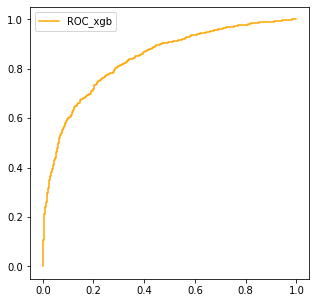

In [10]:
plt.figure(0).clf()
plt.figure(figsize=(5, 5))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC_xgb')
plt.savefig('CatBoost ROC', dpi=150)
plt.legend(loc=0)

In [11]:
confusion_matrix(y_test, y_pred)

array([[1397,  228],
       [ 429,  830]])